In [3]:
import pandas as pd
df = pd.read_csv(r'C:\Users\mac\Desktop\Sem 5\Machine_Learning\ML Assignments\IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

In [8]:
x = df.iloc[:, 0:4]
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
y = df.iloc[:, 4:5]
y

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


[680.8243999999996, 152.36870647733915, 78.94084142614601, 57.34540931571815, 46.535582051282034, 38.930963049671746, 34.18920546865629, 30.21678682589554, 28.17047422606632]


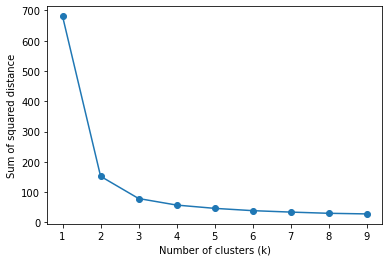

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Sum of squared distance (SSE) between data points and their assigned clusters’ centroids
sse = []
list_k = list(range(1, 10))
for k in list_k:
  km = KMeans(n_clusters=k)
  km.fit(x)
  sse.append(km.inertia_)
  # inertia_: float
  # Sum of squared distances of samples to their closest cluster center
print(sse)
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distance');

In [16]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(x)
centroids = km.cluster_centers_
print(km.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


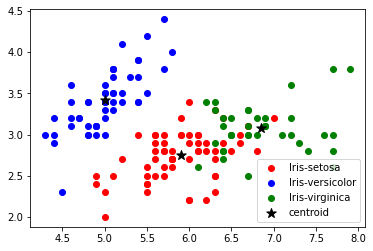

In [19]:
# Filter rows of original data
filtered_label0 = x[km.labels_ == 0]
filtered_label1 = x[km.labels_ == 1]
filtered_label2 = x[km.labels_ == 2]

# Plotting the results
plt.scatter(filtered_label0.iloc[:,0], filtered_label0.iloc[:,1], color = 'red', label='Iris-setosa')
plt.scatter(filtered_label1.iloc[:,0], filtered_label1.iloc[:,1], color = 'blue', label='Iris-versicolor')
plt.scatter(filtered_label2.iloc[:,0], filtered_label2.iloc[:,1], color = 'green', label='Iris-virginica')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100, color='black', label='centroid')
plt.legend()
plt.show()